## **Aprendizagem a partir de Dados de Doenças do Coração**
Importação das bibliotecas.

In [ ]:
import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
from tabulate import tabulate

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap

# bibliotecas para realização de funções relacionadas KNN
from sklearn.model_selection import cross_val_score, KFold, train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_absolute_error, confusion_matrix
from sklearn import datasets
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification


print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


Base de dados do Kaggle: [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

Importação do dataset em formato csv.

In [ ]:
# importa o arquivo e guarda em um dataframe do Pandas
data = pd.read_csv( '/content/heart.csv', encoding='iso-8859_1', delimiter=',', index_col=None)

print('Dados importados com sucesso!')
print(data.shape)

Dados importados com sucesso!
(1025, 14)


# Informações iniciais

Detalhes sobre o conjunto de dados, incluindo informações sobre seus atributos, estão disponíveis a seguir.


**Atributos**
1. age
2. sex: 1 = male; 0 = female)
3. cp: chest pain type
        a) Value 1: typical angina
        b) Value 2: atypical angina
        c) Value 3: non-anginal pain
        d) Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the  hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        a) Value 0: normal
        b) Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        c) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
        a) Value 1: upsloping
        b) Value 2: flat
        c) Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0 = no disease; 1 = disease








In [ ]:
# exibe o dataframe

display(data.head(n=10))


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
data.info()
#display(heart_disease_df.head(n=30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Pré-processamento: eliminação de dados duplicados

Neste passo, os dados duplicados no conjunto de dados são identificados e eliminados. Dados duplicados podem ocorrer quando há registros repetidos no conjunto de dados, o que pode afetar negativamente a análise e os resultados do modelo. Portanto, a eliminação de dados duplicados é uma etapa importante no pré-processamento dos dados para garantir que apenas informações únicas sejam consideradas na análise ou no treinamento do modelo.


In [ ]:
def delDuplicatas( df_dataset ):
    '''
    Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
    '''

    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

data = delDuplicatas( data )

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Normalização de alguns atributos, que estão muito fora de escala
Neste passo, alguns atributos específicos do conjunto de dados são normalizados para garantir que eles estejam na mesma escala. Isso é feito para evitar que esses atributos, que podem ter diferentes escalas e magnitudes, tenham um impacto desproporcional durante a análise ou o treinamento do modelo.

Os atributos escolhidos para normalização são 'age', 'trestbps', 'chol' e 'thalach'. A normalização ajuda a garantir que todos esses atributos estejam em uma escala comparável, tornando a análise e o treinamento do modelo mais eficazes.

In [ ]:
def normalizar(X):


    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1) #ddof = delta degrees of freedom

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


# Normalizar algumas colunas
#columns_to_normalize = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca','thal']
columns_to_normalize = ['age', 'trestbps', 'chol', 'thalach']
X = data[columns_to_normalize].values
# Chama a função para normalizar
X_norm, mu, sigma = normalizar(X)

data[columns_to_normalize] = X_norm

#Exibe a normalização de algumas colunas
data.describe().round(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,-0.000000,0.682119,0.963576,-0.000000,-0.000000,0.149007,0.526490,-0.000000,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,1.000000,0.466426,1.032044,1.000000,1.000000,0.356686,0.526027,1.000000,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,-2.809529,0.000000,0.000000,-2.140967,-2.328345,0.000000,0.000000,-3.430456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.709610,0.000000,0.000000,-0.660615,-0.685944,0.000000,0.000000,-0.712534,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.119305,1.000000,1.000000,-0.091249,-0.115934,0.000000,1.000000,0.127948,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,0.727176,1.000000,2.000000,0.478117,0.545857,0.000000,1.000000,0.717377,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,2.495529,1.000000,3.000000,3.894313,6.134852,1.000000,2.000000,2.289187,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Distribuição dos dados com BoxPlot de maneira geral

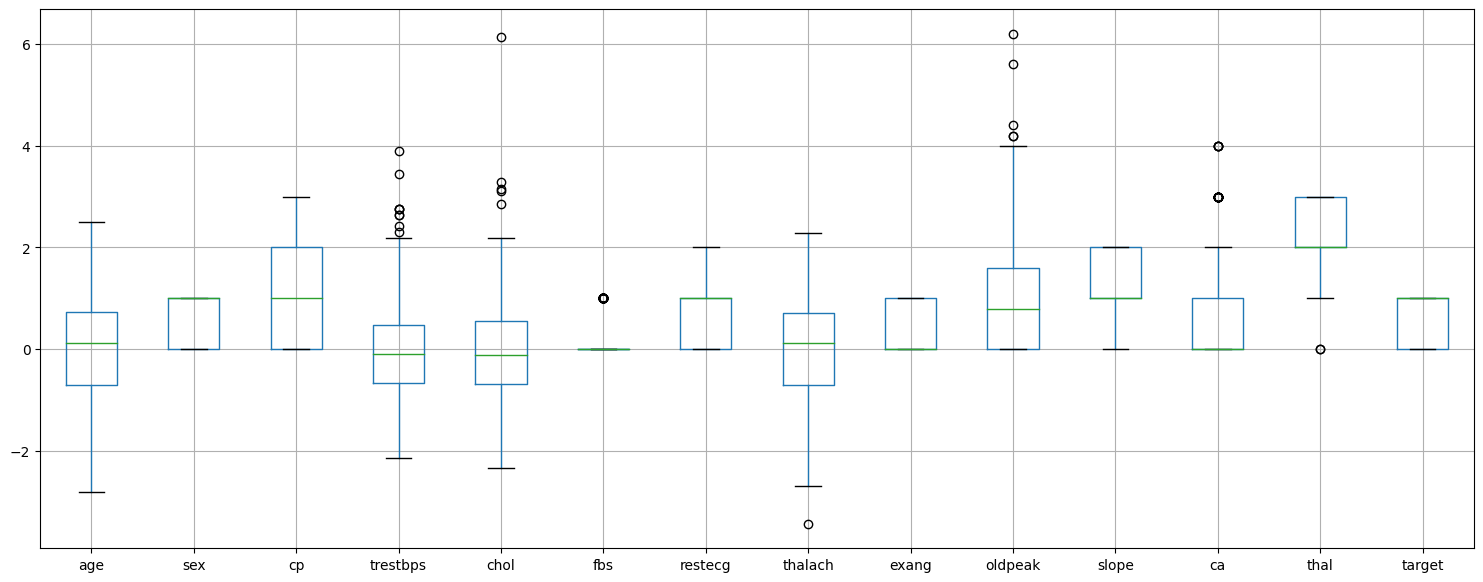

In [ ]:
data.boxplot(figsize=(18.5,7))
plt.show()

# Gráfico de dispersão

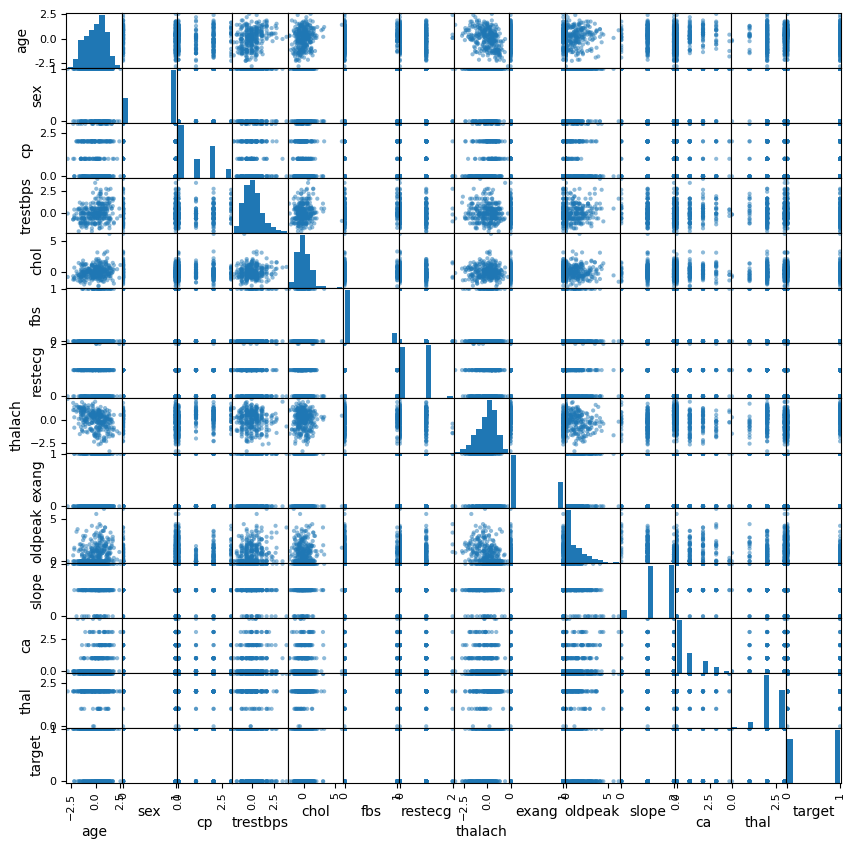

In [ ]:
pd.plotting.scatter_matrix(data, figsize=(10,10))

plt.show()

In [ ]:
sns.pairplot(data, hue='target', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

# Verificando com BoxPlot cada atributo descritivo em relação ao preditivo

In [ ]:
for atributo in data.columns[1:]:
    # define a dimensão do gráfico
    plt.figure(figsize=(12,4))

    # cria o boxplot
    sns.boxplot(x="target", y=atributo, data=data, whis=1.5)

    # mostra o gráfico
    plt.show()

# Contagem da distribuição entre as classes

In [ ]:
display( data['target'].value_counts() )

# define a dimensão do gráfico
plt.figure(figsize=(16,8))

# cria um gráfico de barras com a frequência de cada player_positions
sns.countplot(x="target", data=data)

# mostra o gráfico
plt.show()

# Covariância e correlação

In [ ]:
# criando uma matriz X com os valores do data frame
X = data.iloc[:,:-1].values

# matriz de covariancia
covariance = np.cov(X, rowvar=False)

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

# matriz de covariancia
df_covariance = data.cov()

# matriz de correlação
df_correlation = data.corr()

# cria um mapa de cores dos valores da covariancia
sns.heatmap(df_covariance,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Covariancia')
plt.show()

# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

# Analisando overfitting e underfitting para idade e colesterol com distância Euclideana

(302, 2)


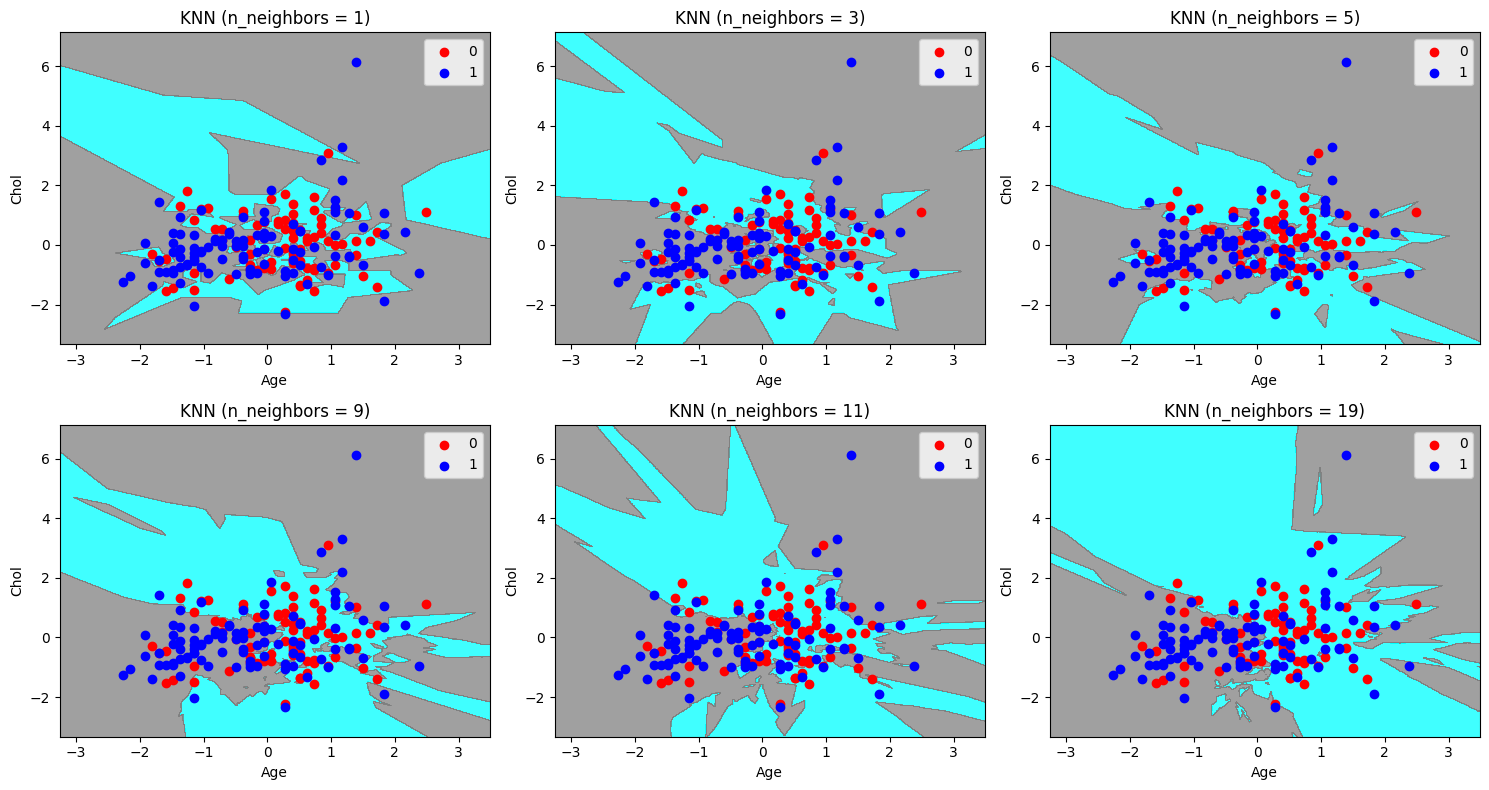

In [ ]:
from sklearn.preprocessing import StandardScaler
#
X = data.iloc[:, [0,4]].values
print(X.shape)
# Definindo a coluna 8 (Output) como preditivo
y = data.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Define the range of n_neighbors values
n_neighbors_values = [1, 3, 5, 9, 11, 19]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Loop over the n_neighbors values
for i, n_neighbors in enumerate(n_neighbors_values):
    # Create a KNN classifier with the current n_neighbors value
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
    classifier.fit(X_train, y_train)

    # Plot the decision boundary
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('cyan', 'gray')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plot the training data points
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Chol')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Analisando métricas de avaliação com KFOLD = 5

(61,)


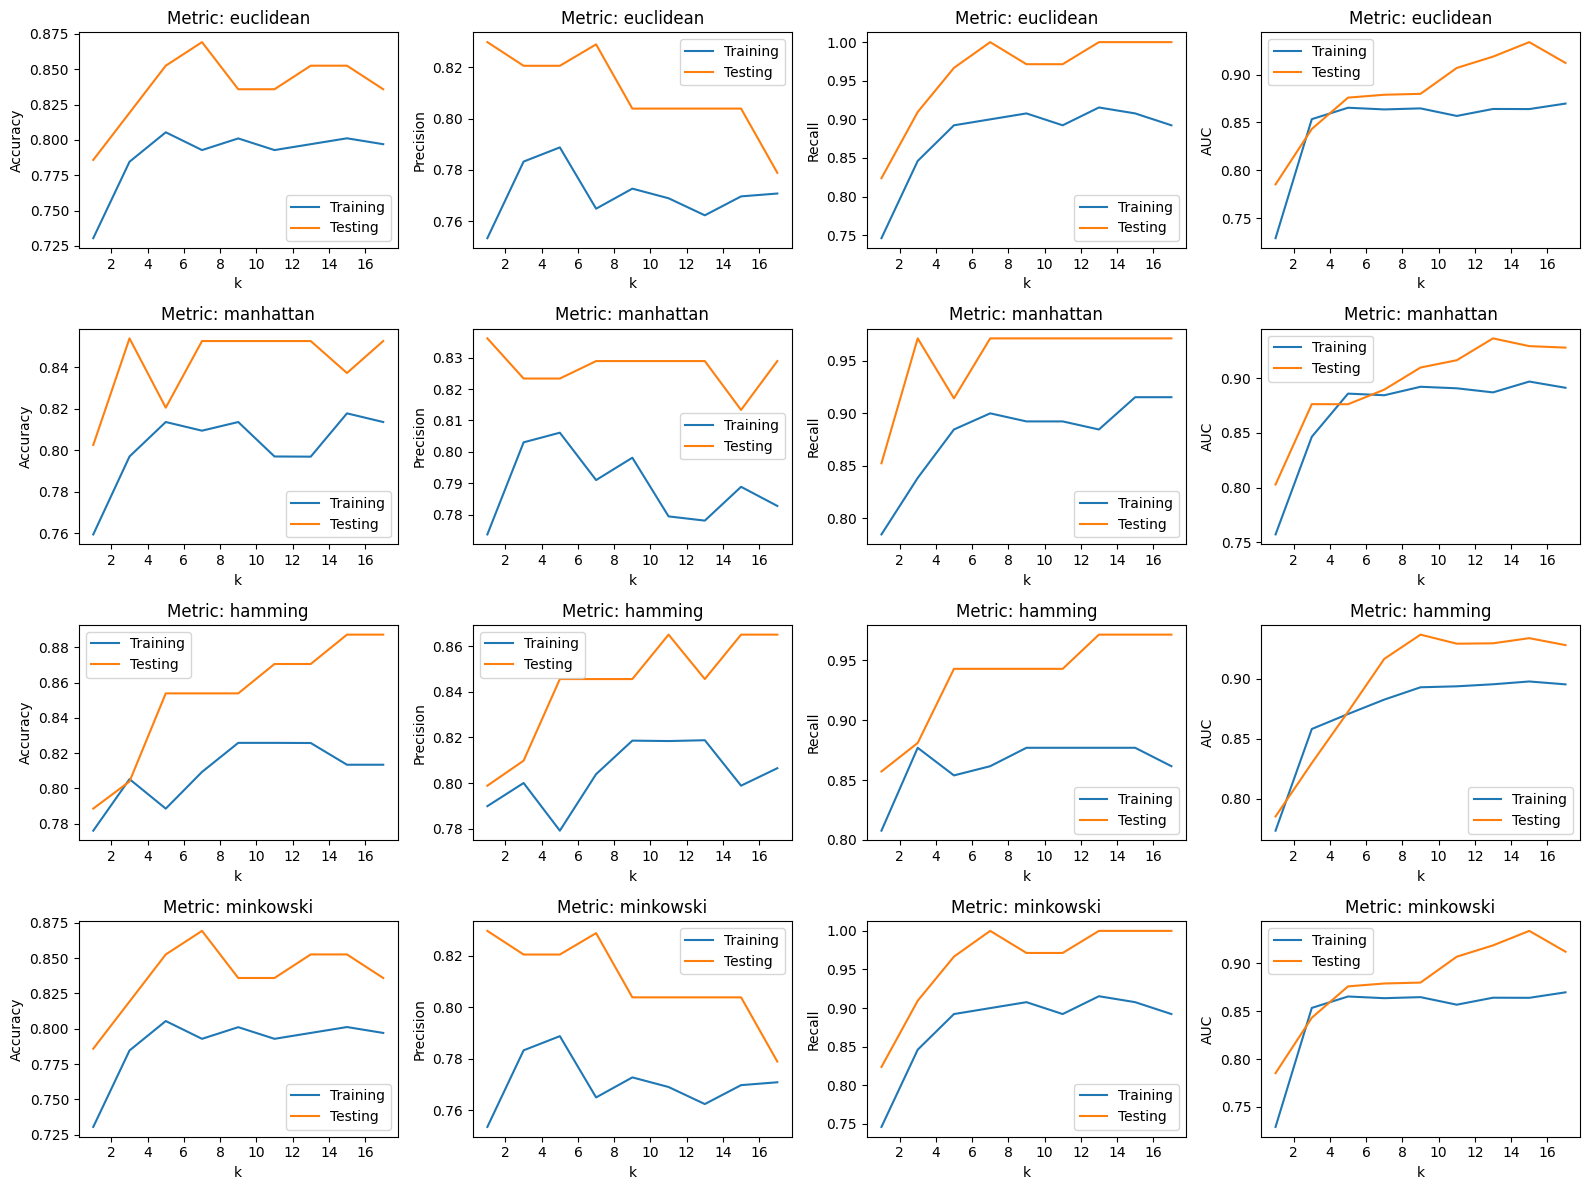

In [ ]:
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print(y_test.shape)
k_list = list(range(1,18,2))
neighbors = k_list
metrics = ['euclidean', 'manhattan', 'hamming', 'minkowski']
performance_measures = ['Accuracy', 'Precision', 'Recall', 'AUC']
performance_values_train = np.empty((len(metrics), len(performance_measures), len(neighbors)))
performance_values_test = np.empty((len(metrics), len(performance_measures), len(neighbors)))

for i, metric in enumerate(metrics):

    for j, measure in enumerate(performance_measures):

        for k, n in enumerate(neighbors):
            knn = KNeighborsClassifier(n_neighbors=n, metric=metric)
            knn.fit(X_train, y_train)
            if measure == 'AUC':
                knn_ovr = OneVsRestClassifier(knn)
                scores_train = cross_val_score(knn_ovr, X_train, y_train, cv=5, scoring='roc_auc')
                scores_test = cross_val_score(knn_ovr, X_test, y_test, cv=5, scoring='roc_auc')

            else:
                scores_train = cross_val_score(knn, X_train, y_train, cv=5, scoring=measure.lower())
                scores_test = cross_val_score(knn, X_test, y_test, cv=5, scoring=measure.lower())

            performance_values_train[i, j, k] = np.mean(scores_train)
            performance_values_test[i, j, k] = np.mean(scores_test)

fig, axs = plt.subplots(len(metrics), len(performance_measures), figsize=(16, 12))
for i, metric in enumerate(metrics):
    for j, measure in enumerate(performance_measures):
        axs[i, j].plot(neighbors, performance_values_train[i, j], label='Training')
        axs[i, j].plot(neighbors, performance_values_test[i, j], label='Testing')
        axs[i, j].set_title(f'Metric: {metric}')
        axs[i, j].legend()
        axs[i, j].set_xlabel('k')
        axs[i, j].set_ylabel(measure)
        axs[i, j].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

# Matriz de confusão com distância Euclidiana
Nesta etapa, é calculada uma matriz de confusão para avaliar o desempenho de um modelo de classificação que utiliza a métrica de distância Euclidiana. A matriz de confusão mostra quantas previsões foram corretas e quantas foram incorretas em relação às classes reais. Isso ajuda a entender o desempenho do modelo, identificando verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

In [ ]:
# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [2, 3, 5, 8, 11, 13, 17]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='euclidean')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão - EUCLIDEAN:")
print(cm)
print("\nAcurácia: {:.2f}%".format(accuracy_test * 100))
print("Sensibilidade: {:.2f}%".format(recall_test * 100))
print("Especificidade: {:.2f}%".format(specificity_test * 100))

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (KNN - EUCLIDEAN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Matriz de confusão com distância de Chebyshev
Nesta etapa, é calculada uma matriz de confusão para avaliar o desempenho de um modelo de classificação que utiliza a métrica de distância de Chebyshev. A distância de Chebyshev é uma métrica de distância usada em análise de dados, particularmente em casos onde se deseja medir a dissimilaridade entre pontos de dados em um espaço multidimensional. Essa métrica calcula a maior diferença entre as coordenadas dos pontos, ignorando a direção.

Matriz de Confusão - CHEBYSHEV:
[[33 23]
 [ 9 56]]

Acurácia: 73.55%
Sensibilidade: 86.15%
Especificidade: 58.93%


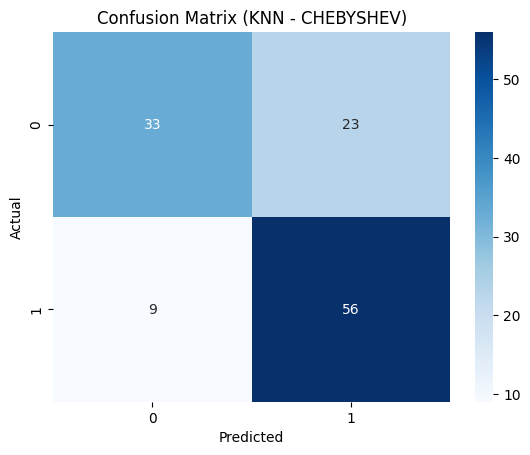

In [ ]:
# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [2, 3, 5, 8, 11, 13, 17]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='chebyshev')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão - CHEBYSHEV:")
print(cm)
print("\nAcurácia: {:.2f}%".format(accuracy_test * 100))
print("Sensibilidade: {:.2f}%".format(recall_test * 100))
print("Especificidade: {:.2f}%".format(specificity_test * 100))

# Plotar a matriz de confusão (Teste)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (KNN - CHEBYSHEV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Matriz de confusão com distância de Canberra
Nesta etapa, é calculada uma matriz de confusão para avaliar o desempenho de um modelo de classificação que utiliza a métrica de distância de Canberra. A distância de Canberra é uma métrica de dissimilaridade amplamente utilizada em análise multivariada de dados. É especialmente útil quando você está lidando com dados que consistem em contagens ou proporções, como em problemas de ecologia, biologia e análise de texto.

Matriz de Confusão - CANBERRA:
[[37 19]
 [ 7 58]]

Acurácia: 78.51%
Sensibilidade: 89.23%
Especificidade: 66.07%


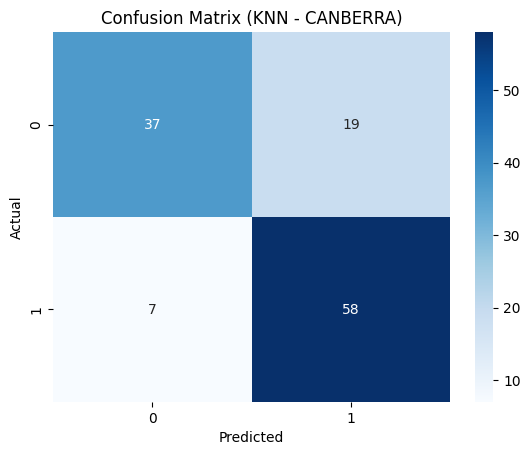

In [ ]:
# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [2, 3, 5, 8, 11, 13, 17]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='canberra')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão - CANBERRA:")
print(cm)
print("\nAcurácia: {:.2f}%".format(accuracy_test * 100))
print("Sensibilidade: {:.2f}%".format(recall_test * 100))
print("Especificidade: {:.2f}%".format(specificity_test * 100))

# Plotar a matriz de confusão (Teste)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (KNN - CANBERRA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Matriz de confusão com distância de Bray-Curtis
Nesta etapa, é calculada uma matriz de confusão para avaliar o desempenho de um modelo de classificação que utiliza a métrica de distância de Bray-Curtis. A distância de Bray-Curtis é uma métrica de dissimilaridade usada em análise multivariada de dados, especialmente em ecologia e biologia. É utilizada para medir a dissimilaridade entre dois conjuntos de dados que contêm contagens de elementos, como espécies de animais em diferentes habitats.

Matriz de Confusão - BRAYCURTIS:
[[36 20]
 [ 5 60]]

Acurácia: 79.34%
Sensibilidade: 92.31%
Especificidade: 64.29%


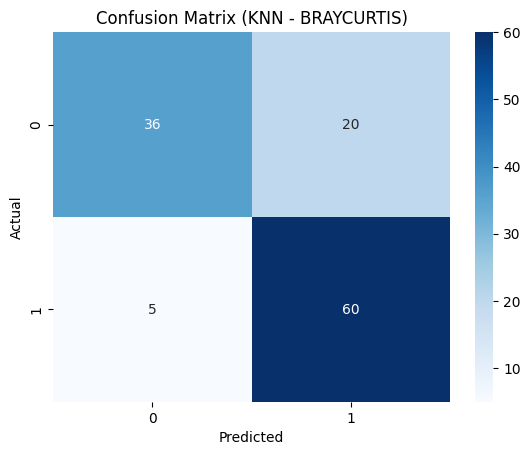

In [ ]:
# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [2, 3, 5, 8, 11, 13, 17]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='braycurtis')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão - BRAYCURTIS:")
print(cm)
print("\nAcurácia: {:.2f}%".format(accuracy_test * 100))
print("Sensibilidade: {:.2f}%".format(recall_test * 100))
print("Especificidade: {:.2f}%".format(specificity_test * 100))

# Plotar a matriz de confusão (Teste)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (KNN - BRAYCURTIS)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# **Naive Bayes**





In [1]:
#Implementando um Classificador Naive Bayes Simples
#Data:31/07/2023

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            mean = X_c.mean(axis=0)
            variance = X_c.var(axis=0)
            parameters = {"mean": mean, "variance": variance, "prior": X_c.shape[0] / X.shape[0]}
            self.parameters.append(parameters)

    def _pdf(self, X, mean, variance):
        return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((X - mean) ** 2) / (2 * variance))

    def predict(self, X):
        likelihoods = []
        for i, c in enumerate(self.classes):
            parameters = self.parameters[i]
            prior = parameters["prior"]
            likelihood = np.prod(self._pdf(X, parameters["mean"], parameters["variance"]), axis=1)
            likelihoods.append(prior * likelihood)
        return self.classes[np.argmax(likelihoods, axis=0)]

    # Função para plotar a superfície de decisão
    def plot_decision_surface(self, X, y):
      h = .02  # Passo da grade
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
      grid_points = np.c_[xx.ravel(), yy.ravel()]

      Z = self.predict(grid_points)
      Z = Z.reshape(xx.shape)

      cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
      cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

      plt.figure(figsize=(8, 6))
      plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

      # Plotar os pontos de treinamento
      plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Superfície de Decisão do Naive Bayes")
      plt.xlabel("Feature 1")
      plt.ylabel("Feature 2")
      plt.show()

In [ ]:
# Criar a base de dados 2-moons
from sklearn.preprocessing import StandardScaler
#
X = data.iloc[:,0:12].values
print(X.shape)
# Definindo a coluna 8 (Output) como preditivo
y = data.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#X, y = make_classification(n_samples=1000, n_features=2,class_sep=2.0, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=2)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
# Dividir o conjunto de dados em treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Criar e treinar o Classificador Naive Bayes
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = nb.predict(X_test)

# Calcular a acurácia do classificador
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_train, y_pred_cv)
specificity = specificity_score(y_train, y_pred_cv)
print(f'Naive Bayes\nAcurácia: {accuracy:.2f}')
print(f'Sensibilidade: {recall:.2f}')
print(f'Especificidade: {specificity:.2f}')

(302, 12)
Naive Bayes
Acurácia do: 0.80
Sensibilidade: 0.87
Especificidade: 0.82


Existem 121 amostras para teste



Text(0.5, 23.52222222222222, 'Predicted')

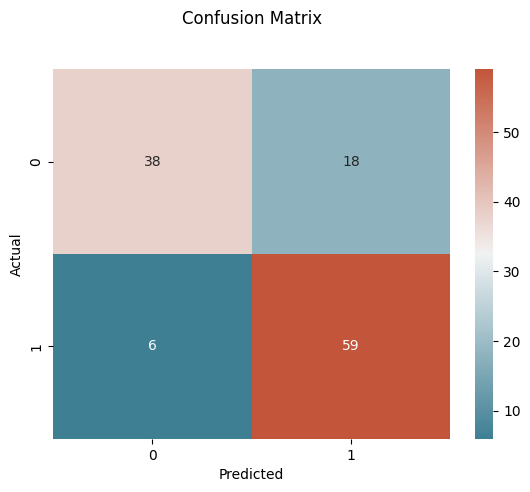

In [ ]:
#Matriz de confusão
# Criar e treinar o Classificador Naive Bayes
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = nb.predict(X_test)

print('Existem ' + str(len(y_pred)) + ' amostras para teste\n')
matrix = confusion_matrix(y_test, y_pred)
color = sns.diverging_palette(220, 20, as_cmap=True)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap=color ,fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# **O Perceptron Simples:**
Implementando um perceptron para simular a porla lógica AND. Depois testar a porta XOR.

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, dim_entrada, taxa_aprendizado=0.01, epocas=100):
        self.dim_entrada = dim_entrada
        self.taxa_aprendizado = taxa_aprendizado
        self.epocas = epocas
        self.pesos = np.random.rand(dim_entrada + 1)  # +1 para o bias
        self.erros = []

    # Funcao Degrau
    def funcao_ativacao(self, x):
        return 1 if x >= 0 else 0

    # Funcao de Predicao
    def predicao(self, X):
        X_with_bias = np.c_[X, np.ones(len(X))]
        return np.array([self.funcao_ativacao(np.dot(x, self.pesos)) for x in X_with_bias])

    # Funcao de treinamento
    def treina(self, X, y):
        X_with_bias = np.c_[X, np.ones(len(X))]
        for _ in range(self.epocas):
            total_erro = 0
            for i in range(len(X_with_bias)):
                erro = y[i] - self.funcao_ativacao(np.dot(X_with_bias[i], self.pesos))
                self.pesos += self.taxa_aprendizado * erro * X_with_bias[i]
                total_erro += int(erro != 0)
            self.erros.append(total_erro)

# Exemplo de uso (AND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

perceptron = Perceptron(dim_entrada=2, taxa_aprendizado=0.1, epocas=100)
perceptron.treina(X, y)

# Testando a previsão
print("Esperado:", y)
print("Previsão:", perceptron.predicao(X))

#Pesos
print("Pesos sinápticos:", perceptron.pesos)

Esperado: [0 0 0 1]
Previsão: [0 0 0 1]
Pesos sinápticos: [ 0.20871987  0.27134481 -0.33955299]


# A rede Percetron de Multiplas Camadas, ou rede MLP.

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


class MLP:
    def __init__(self, dim_entrada, dim_oculta, dim_saida, taxa_aprendizado=0.01):
        self.dim_entrada = dim_entrada
        self.dim_oculta = dim_oculta
        self.dim_saida = dim_saida
        self.taxa_aprendizado = taxa_aprendizado

        # Inicialização dos pesos e bias das camadas oculta e de saída
        self.pesos_ocultos = np.random.rand(self.dim_entrada, self.dim_oculta)
        self.bias_ocultos = np.zeros(self.dim_oculta)

        self.pesos_saida = np.random.rand(self.dim_oculta, self.dim_saida)
        self.bias_saida = np.zeros(self.dim_saida)

    # Funcao de Ativacao Sigmoide
    def sigmoide(self, x):
        return 1 / (1 + np.exp(-x))

    # Derivada Primeirada Funcao de Ativacao Sigmoide
    def sigmoide_derivada(self, x):
        return x * (1 - x)

    # Calculo da saída da rede MLP
    def feedforward(self, X):
        # Calculo da saida da Camada oculta
        camada_oculta_entrada = np.dot(X, self.pesos_ocultos) + self.bias_ocultos
        camada_oculta_saida = self.sigmoide(camada_oculta_entrada)

        # Calculo da saida da Camada de saída
        camada_saida_entrada = np.dot(camada_oculta_saida, self.pesos_saida) + self.bias_saida
        saida = self.sigmoide(camada_saida_entrada)

        return camada_oculta_saida, saida

    def backpropagation(self, X, y, camada_oculta_saida, saida):
        # Backpropagation
        saida_erro = y - saida
        saida_delta = saida_erro * self.sigmoide_derivada(saida)

        camada_oculta_erro = saida_delta.dot(self.pesos_saida.T)
        camada_oculta_delta = camada_oculta_erro * self.sigmoide_derivada(camada_oculta_saida)

        # Atualização dos pesos e bias
        self.pesos_saida += camada_oculta_saida.T.dot(saida_delta) * self.taxa_aprendizado
        self.bias_saida += np.sum(saida_delta, axis=0) * self.taxa_aprendizado

        self.pesos_ocultos += X.T.dot(camada_oculta_delta) * self.taxa_aprendizado
        self.bias_ocultos += np.sum(camada_oculta_delta, axis=0) * self.taxa_aprendizado

    def fit(self, X, y, epocas=1000):
        for epoca in range(epocas):
            # Forward propagation
            camada_oculta_saida, saida = self.feedforward(X)
            # Backpropagation
            self.backpropagation(X, y, camada_oculta_saida, saida)

    def predicao(self, X):
        _, saida = self.feedforward(X)
        return saida

    # Função para plotar a superfície de decisão
    def plot_decision_surface(self, X, y):
      h = .02  # Passo da grade
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
      grid_points = np.c_[xx.ravel(), yy.ravel()]

      Z = self.predicao(grid_points)
      Z = Z.reshape(xx.shape)

      cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
      cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

      plt.figure(figsize=(8, 6))
      plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

      # Plotar os pontos de treinamento
      plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Superfície de Decisão da Rede MLP")
      plt.xlabel("Feature 1")
      plt.ylabel("Feature 2")
      plt.show()

In [ ]:
#Programa Principal
# Gerando dados de exemplo
#X, y = make_classification(n_samples=200, class_sep=0.5, n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=2)
X, y = make_moons(n_samples=100, shuffle=True, noise=0.5, random_state=None)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape dos rótulos para se adequar ao formato de saída da rede
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

# Criando e treinando a MLP
mlp = MLP(dim_entrada=2, dim_oculta=10, dim_saida=1, taxa_aprendizado=0.1)
mlp.fit(X_train, y_train, epocas=1000)

# Realizando previsões no conjunto de teste
saida_prevista = mlp.predicao(X_test)

# Convertendo as previsões para classes (0 ou 1)
predicao_classes = (saida_prevista > 0.5).astype(int)

# Calculando a acurácia
acuracia = np.mean(predicao_classes == y_test)
print(f'Acurácia da MLP: {acuracia}')

Acurácia da MLP: 0.95


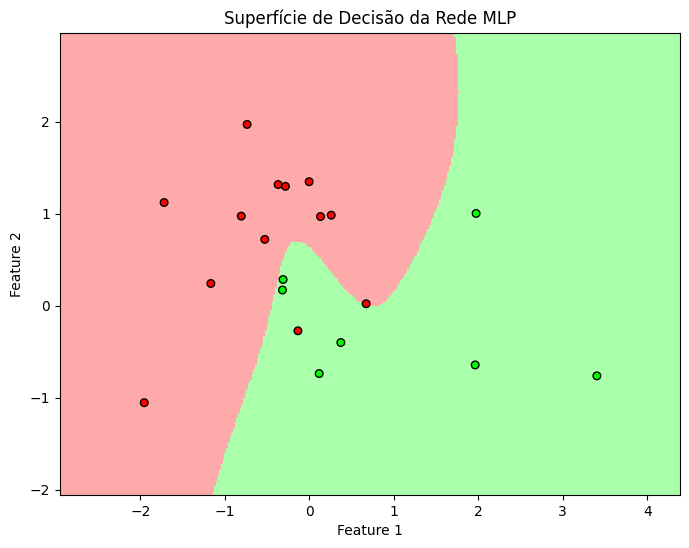

In [ ]:
mlp.plot_decision_surface(X_test, y_test)

# A rede Percetron de Multiplas Camadas (MLP) com o dataset

Este código demonstra a avaliação de um modelo de classificação binária usando um classificador Multi-Layer Perceptron (MLP) da biblioteca scikit-learn.

Matriz de Confusão - MLP:
[[102   0]
 [  3 100]]

Acurácia: 98.54%
Sensibilidade: 97.09%
Especificidade: 100.00%


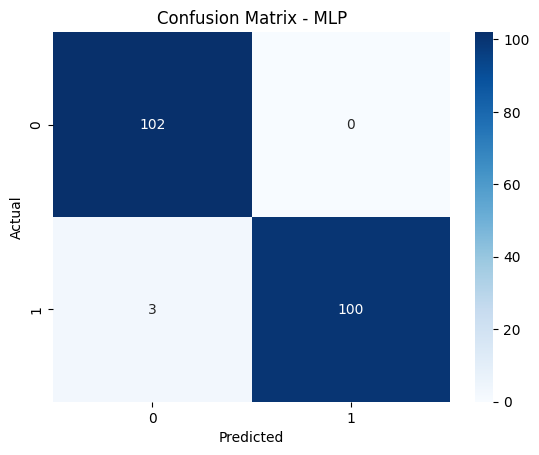

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados
data = pd.read_csv('/content/heart.csv', encoding='iso-8859-1', delimiter=',', index_col=None)

# Separando os atributos (X) e os rótulos (y)
X = data.drop('target', axis=1)
y = data['target']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando e treinando a MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Realizando previsões no conjunto de teste
y_pred = mlp.predict(X_test)

# Calculando métricas de avaliação
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)

# Calculando especificidade manualmente
TN, FP, FN, TP = cm.ravel()
specificity_test = TN / (TN + FP)

# Imprimir os resultados
print("Matriz de Confusão - MLP:")
print(cm)
print("\nAcurácia: {:.2f}%".format(accuracy_test * 100))
print("Sensibilidade: {:.2f}%".format(recall_test * 100))
print("Especificidade: {:.2f}%".format(specificity_test * 100))

# Plotando a matriz de confusão
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()
